Using NN for the Classification Task of handwritten digits

In [ ]:
# hand written digits
from google.colab import drive
drive.mount('/content/drive')
import numpy as np

Mounted at /content/drive


In [ ]:
path="/content/drive/My Drive/Colab Notebooks/WCS/"

In [ ]:
import pandas as pd
train_data = pd.read_csv(path+'mnist_train_100.csv', header = None)
#train_data.iloc[0]
train_data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Load the data:
raw_data = open(path + "mnist_train_100.csv", 'r') # "r" stands for "read only" mode.
data = raw_data.readlines() # read all the lines of a file in a list.
raw_data.close() # remove temporal file from the environment in order to save memory.

In [ ]:
type(data)

list

In [ ]:
# Inspect the data - check the number of observations:
len(data) # length of the object.

100

In [ ]:
# Inspect a particular observation of the data:
data[0] # show observation number 0 from the list (remember that in Python numbering starts from 0).


'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

- A particular observation looks like a string of 785 elements (label of the
image + 784 elements for each pixels of a 28x28 image).
- Each element representing a pixel is a number from 0 to 255 (from white to black color).
- The first element in the line is the label of the image and therefore is a number from 0 to 9.

Using matplotlib, we can also reconstruct the original image based on the data about each pixel in the string.


In [ ]:
# Load the package to plot the data:
import matplotlib.pyplot as mpp
%matplotlib inline

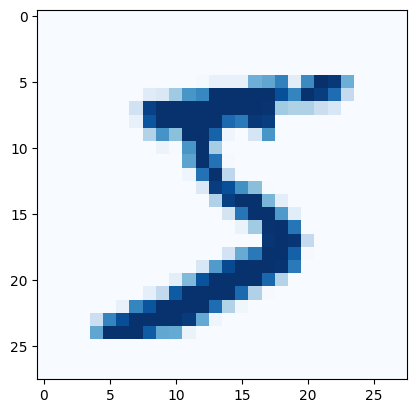

In [ ]:
# Plot the data:
observation = data[0].split(',') # break down observation number 0 (comma is used to identify each element).
image = np.asfarray(observation[1:]).reshape((28,28)) #asfarray returns an array converted as float
#print(image)
# take all the elements starting from the element 1
# (exclude element number 0, that corresponds to the label) and reshape them as an array with dimension 28 by 28.
mpp.imshow(image, cmap='Blues') # show the plot of this array using blue pallete.

For each observation we have 784 elements/features as an input (label element is excluded). Accordingly,  we should have 784 iput nodes.
Similarly, as we have 10 different options for the outcome (handwritten numbers are labeled from 0 to 9) the number of output nodes should be 10 .
As the number of hidden nodes from we could start by using 90. Such a number has been assigned based on some proportionality assumptions which will be checked later: 90 is 9 times higher than 10 and approximately 9 times smaller than 784.

We are now going to  implement the  neural network with the Keras framework. Keras is an open source neural network library written in Python.
https://keras.io/api/models/model_training_apis/


In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd

In [ ]:
names = ["y"] + list(range(1,785))


df = pd.read_csv(path+"mnist_train.csv",
                 names=names)

df_test = pd.read_csv(path+"mnist_test.csv",
                     names=names)

In [ ]:
df.shape

(60000, 785)

In [ ]:
df_test.shape

(10000, 785)

Next we separate labels from features in both train and test set and transform them from dataframes to numpy arrays, which are better suited for modeling.

In [ ]:
df.head()

,y,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train = df['y'].values
# normalizing the data and making sure to not have only 0
# Our values in our input vector are in the range from 0 to 255. Therefore we should divide input vector by 255,
# multiply it by 0,99 and add 0,01 in order to get values in the range from 0,01 to 1.
X_train = df.iloc[:, 1:].values/255*0.99+0.01

y_test = df_test['y'].values
X_test = df_test.iloc[:, 1:].values/255*0.99+0.01

[y_train, y_test, X_train, X_test]

[array([5, 0, 4, ..., 5, 6, 8]),
 array([7, 2, 1, ..., 4, 5, 6]),
 array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        ...,
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01]]),
 array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        ...,
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01]])]

We now check if the shape of the arrays correspond to the expected. In fact, the shape is correct. We have 60 thousand observations in the train set and 10 thousand in the test set.



In [ ]:
[y_train.shape, X_train.shape, y_test.shape, X_test.shape]


[(60000,), (60000, 784), (10000,), (10000, 784)]

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8])

Before defining the model, one extra step is necessary: transform the labels so they are one-hot encoded. One-hot encoding a vector means transforming it into a matrix of ones and zeroes only with as many columns as the number of different values in the vector. In the specific case, the label vector becomes a ten-column array, each column representing one digit. If the label of the observation is 2, it will have zeroes in columns expect in the third column, which will have a one. The number of rows remains the same.

https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

 **NOTE**
important for Loss function:
If your labels are one hot encoded then you should use "categorical_crossentropy" loss
If your labels are encoded as numbers (0 to n-1 for n class classification) then you should use "sparse_categorical_crossentropy" loss


In [ ]:
# you can One Hot encode in different ways
# 1. with np_utils.to_categorical (works here cause its already an int var)
# 2. with pandas.get_dummies if it is applied on the initial pandas dataframe
# 3. with 'from sklearn.preprocessing import OneHotEncoder OR LabelEncoder'

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

[y_test.shape, y_train.shape]

[(10000, 10), (60000, 10)]

In [ ]:
y_train.shape


(60000, 10)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

##Define the model

The model in question consists of one input, one hidden and one output layer. The activation function of the hidden layer is a ReLU. And we use as the optimizer Stochastic Gradient Descent.

Once the activation function and optimizers are selected, it is time to determine the structure of the NN. Keras makes it very simple to add new layers. One needs only to call the add method on the model and pass the layer with its specifications. As you can see, the number of inputs needs to be specified only in the first layer. Keras infers the input number of a layer by looking at the number of outputs of its predecessor.

For this neural network, we will only use dense layers, which are layers with all nodes fully connected to each other. Keras, however, allows you to arbitrarily build your neural networks by providing different types of layers, such as convolutional and pooling layers.

## Let's put down what we have decided on already: ##
Keras offer you **two "styles" of setting up the structure of your network** (they call it two types of model): **sequential and functional API** https://www.analyticsvidhya.com/blog/2021/07/understanding-sequential-vs-functional-api-in-keras/. It's a matter of preference in most cases, we will stick to **sequential** when the layers follow sequentially one after the other as it is slightly leaner in notation.


In [ ]:
# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
num_input_units = X_train.shape[1] # 784
num_classes = y_train.shape[1] #10
num_hidden_n =  90

optimizer = 'sgd'

#OR
#from keras import optimizers
# there are many more parameters that we could be adding here
# optimizer = keras.optimizers.SGD(lr=0.01, decay=0.1, momentum=0.1)
# learning rate is set in the optimizer
# learning rates 0.1,0.01,0.001 are good values to test and start with


In [ ]:
model = Sequential()
    #first hidden layer
model.add(Dense(num_hidden_n, input_dim=num_input_units, kernel_initializer='normal', activation='relu'))


# Start adding layers one by one:
#model.add(Dense(nb_units,  #number of neurons/nodes/units in hidden layer
         #       activation='relu',  #activation function
          #      kernel_initializer=keras.initializers.he_normal(seed=seed),  #initialisation of weights; check doc for more options
           #     bias_initializer='zeros', #initialization of biases, will also be done by default
            #    input_shape=(X.shape[1],))) #number of input features in your dataset, i.e number of nodes in your input layer, i.e. number of features

#you can add more hidden layers etc.
#model.add(Dense(50, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
#output layer
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', # loss function is defined by the task
                  optimizer=optimizer,
                  metrics=['accuracy', 'auc'])


In [ ]:
num_classes

10

In [ ]:
# we can also write it all in a function
def baseline_model(num_hidden_n, num_input_units, num_classes, optimizer):
    model = Sequential()
    #first hidden layer
    model.add(Dense(num_hidden_n, input_dim=num_input_units, kernel_initializer='normal', activation='relu'))
    #           kernel_initializer=keras.initializers.he_normal(seed=seed),  #initialisation of weights; check doc for more options

    #you can add more hidden layers etc.
    #model.add(Dense(50, input_dim=num_input_units, kernel_initializer='normal', activation='relu'))
    #output layer
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

##Instantiate the model
Having defined the structure of the model, we can now instantiate a concrete version of it by picking the relevant parameters and calling the function that returns the model object.

Here we have chosen the hidden layers to have 90 nodes, while input and output layers have 784 and 10 nodes respectively.

In [ ]:
model = baseline_model(num_hidden_n, num_input_units, num_classes, optimizer)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 90)                70650     
                                                                 
 dense_3 (Dense)             (None, 10)                910       
                                                                 
Total params: 71560 (279.53 KB)
Trainable params: 71560 (279.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# lets recreate the parameters
# input to hidden layer:

print(X_train.shape[1] * num_hidden_n + num_hidden_n)
#(dimension of W_h_i, number of features X.shape[1] * number hidden layer neuron + bias vector size)


# hidden to output layer
print(num_hidden_n * num_classes + num_classes)
#(dimension of W_h_o , bias parameters)

70650
910


In [ ]:
# Functional API analogue
from keras.layers import Input, Dense
from keras.models import Model

inputs = Input(shape=(X_train.shape[1],))
layer1 = Dense(num_hidden_n,  activation='relu', #activation function
                kernel_initializer='normal', #initialisation of weights,
                bias_initializer='zeros')(inputs)
layer2 = Dense(num_hidden_n,activation='relu',kernel_initializer='normal',bias_initializer='zeros')(layer1)
predictions = Dense(num_classes, activation='softmax')(layer2)

model2 = Model(inputs=inputs, outputs=predictions)
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 90)                70650     
                                                                 
 dense_5 (Dense)             (None, 90)                8190      
                                                                 
 dense_6 (Dense)             (None, 10)                910       
                                                                 
Total params: 79750 (311.52 KB)
Trainable params: 79750 (311.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# input to hidden layer:

print(X_train.shape[1] * num_hidden_n + num_hidden_n)
#(dimension of W_h_i, number of features X.shape[1] * number hidden layer neuron + bias vector size)

# first hidden to second hidden layer
print(num_hidden_n * num_hidden_n + num_hidden_n)
#(number hidden layers neuron from first hidden layer *number of hidden layers neuron second hidden layer
# + (number of hidden layer nerons second hidden layer =number of bias terms))

# second hidden to output layer
print(num_hidden_n * num_classes + num_classes)
#(dimension of W_h_o + bias parameters)

70650
8190
910


##Train and evaluate the model
With the model instantiated, we can finally call the fit method on it using the data set we prepared before.

After training the model we evaluate its performance by looking at its accuracy.

In [ ]:
X_train.shape

(60000, 784)

Batch size determines how many examples you look at before making a weight update. The lower it is, the noisier the training signal is going to be, the higher it is, the longer it will take to compute the gradient for each step.


To understand what the batch size should be, it's important to see the relationship between batch gradient descent, online SGD, and mini-batch SGD. Here's the general formula for the weight update step in mini-batch SGD, which is a generalization of all three types.
assume |𝑥| to be the number of datapoints
1. Batch gradient descent, 𝐵=|𝑥|
2. Online stochastic gradient descent: 𝐵=1
3. Mini-batch stochastic gradient descent: 𝐵>1 but 𝐵<|𝑥|.

Batch gradient descent updates the weights using the gradients of the entire dataset 𝑥; whereas SGD updates the weights using an average of the gradients for a mini-batch 𝑚. (Using the average as opposed to a sum prevents the algorithm from taking steps that are too large if the dataset is very large.


In [ ]:
y_test.shape

(10000, 10)

In [ ]:

# by defining the batch size, keras will automatically use the gradient descent related to it
model.fit(X_train,
          y_train,
          epochs=5,
          batch_size=200, # if unspecified defaulted to 32
          verbose=1
          #validation_data=(X_test, y_test) #OR validation_split=0.3
          )

scores = model.evaluate(X_test, y_test, verbose=1)
print("Error Rate: %.2f%%" % (100-scores[1]*100))

Epoch 1/5
300/300 [==============================] - 1s 3ms/step - loss: 2.0124 - accuracy: 0.4717
Epoch 2/5
300/300 [==============================] - 1s 3ms/step - loss: 1.1905 - accuracy: 0.7821
Epoch 3/5
300/300 [==============================] - 1s 3ms/step - loss: 0.7535 - accuracy: 0.8331
Epoch 4/5
300/300 [==============================] - 1s 3ms/step - loss: 0.5902 - accuracy: 0.8574
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.4600 - accuracy: 0.8817
Error Rate: 11.83%


In [ ]:
scores

[0.4599691927433014, 0.8816999793052673]


The error rate does not seem very good. Maybe we could try a different optimizer. We have already learned about one - stochastic gradient descent, it is considered the basic one. Improved performance can be achieved by using optimizers like Rmsprop, Adagrad, Adam, etc that use adjusted learning rate shedule.

We will instantiate and fit the model again with the adam optimization algorithm. By using Keras, the only thing you need to do is to pass a different argument to the model.

[ ]

In [ ]:
model = baseline_model(num_hidden_n,
                       num_input_units,
                       num_classes,
                       optimizer = "adam")

In [ ]:
#Compile model
#model.compile(loss='categorical_crossentropy',
 #                 optimizer='adam',
  #                metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 90)                70650     
                                                                 
 dense_8 (Dense)             (None, 10)                910       
                                                                 
Total params: 71560 (279.53 KB)
Trainable params: 71560 (279.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
story = model.fit(X_train,
          y_train,
          epochs=5,
          batch_size=200,
          validation_split=0.2,
          verbose=1)

Epoch 1/5
240/240 [==============================] - 2s 6ms/step - loss: 0.5998 - accuracy: 0.8477 - val_loss: 0.2843 - val_accuracy: 0.9216
Epoch 2/5
240/240 [==============================] - 1s 4ms/step - loss: 0.2643 - accuracy: 0.9253 - val_loss: 0.2203 - val_accuracy: 0.9377
Epoch 3/5
240/240 [==============================] - 1s 4ms/step - loss: 0.2081 - accuracy: 0.9402 - val_loss: 0.1844 - val_accuracy: 0.9493
Epoch 4/5
240/240 [==============================] - 1s 4ms/step - loss: 0.1704 - accuracy: 0.9508 - val_loss: 0.1606 - val_accuracy: 0.9540
Epoch 5/5
240/240 [==============================] - 1s 4ms/step - loss: 0.1452 - accuracy: 0.9584 - val_loss: 0.1419 - val_accuracy: 0.9585


In [ ]:
X_test.shape

(10000, 784)

In [ ]:

scores = model.evaluate(X_test, y_test, verbose = 2)
print("Error Rate: %.2f%%" % (100-scores[1]*100))

313/313 - 0s - loss: 0.1366 - accuracy: 0.9587 - 419ms/epoch - 1ms/step
Error Rate: 4.13%


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.13659034669399261
Test accuracy: 0.9587000012397766


In [ ]:

# loss and accuracy for train set, if you set validation set then you ll also see those
story.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
story.history['accuracy']

[0.8476874828338623,
 0.9252916574478149,
 0.9401666522026062,
 0.9508125185966492,
 0.9584375023841858]

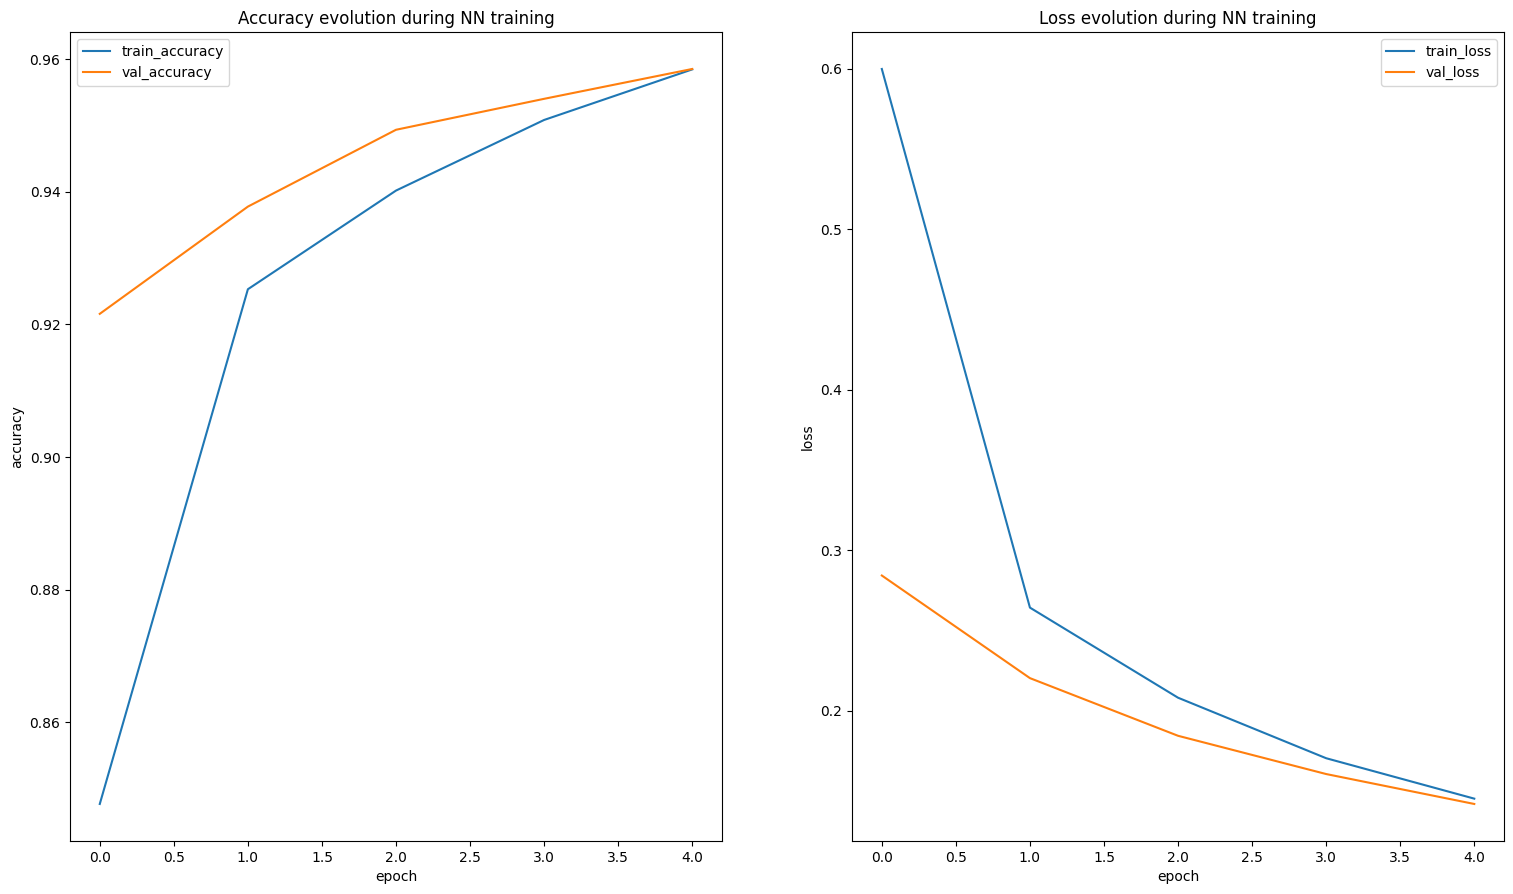

In [ ]:
import matplotlib.pyplot as plt

def show_history(story):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18.5, 10.5)
    ax1.plot(story.history['accuracy'])
    ax1.plot(story.history['val_accuracy'])
    ax1.set(xlabel='epoch', ylabel='accuracy')
    ax1.legend(['train_accuracy', 'val_accuracy'], loc='best')
    ax1.set_title('Accuracy evolution during NN training')

    ax2.plot(story.history['loss'])
    ax2.plot(story.history['val_loss'])
    ax2.set(xlabel='epoch', ylabel='loss')
    ax2.legend(['train_loss', 'val_loss'], loc='best')
    ax2.set_title('Loss evolution during NN training')
    plt.show()

show_history(story)

If validation loss >> training loss you can call it overfitting.

If validation loss  > training loss you can call it some overfitting.

If validation loss  < training loss you can call it some underfitting.

If validation loss << training loss you can call it underfitting.

Just right if training loss ~ validation loss
https://towardsdatascience.com/dont-overfit-how-to-prevent-overfitting-in-your-deep-learning-models-63274e552323

In [ ]:
# Compute predictions
yhat = model.predict(X_test)
yhat.shape

313/313 [==============================] - 0s 1ms/step


(10000, 10)

In [ ]:
yhat

array([[2.2957573e-05, 5.4632228e-08, 8.7736914e-04, ..., 9.9523830e-01,
        3.6001096e-05, 2.2240751e-04],
       [1.3652302e-05, 9.3854131e-04, 9.9765819e-01, ..., 3.6945502e-09,
        1.6242788e-04, 5.5425966e-11],
       [4.4933455e-05, 9.9169600e-01, 2.3349740e-03, ..., 2.5778429e-03,
        1.1474575e-03, 1.1058189e-04],
       ...,
       [1.7939418e-07, 2.7657144e-08, 3.4734242e-07, ..., 2.7090015e-05,
        2.4297035e-04, 2.4248264e-03],
       [3.8351368e-06, 3.4085784e-07, 1.3258258e-07, ..., 4.9206200e-08,
        2.2483033e-03, 3.4176855e-07],
       [1.9152261e-05, 3.5088373e-08, 6.9229449e-05, ..., 3.0439682e-09,
        3.4584925e-08, 2.3266788e-08]], dtype=float32)

In [ ]:
# Finding the most probable class
yhat_c = np.argmax(yhat, axis=1)
print(yhat_c)

[7 2 1 ... 4 5 6]


In [ ]:
yhat_c[0]

7

In [ ]:
from sklearn.metrics import classification_report
target_names = ["0","1","2","3","4","5", "6","7","8","9"]
true_label = np.argmax(y_test,axis = 1)
print ('\nClasification report:\n', classification_report(true_label, yhat_c, target_names=target_names))


Clasification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.97      0.95      0.96      1032
           3       0.95      0.95      0.95      1010
           4       0.96      0.97      0.96       982
           5       0.95      0.95      0.95       892
           6       0.96      0.96      0.96       958
           7       0.96      0.95      0.96      1028
           8       0.94      0.94      0.94       974
           9       0.94      0.94      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 4.0 MB/s eta 0:00:00


In [ ]:
import keras
import tensorflow as tf
import tensorflow_addons as tfa


metrics = [
    #keras.metrics.Precision(),
    #keras.metrics.Recall(),
    keras.metrics.AUC(),
    #tfa.metrics.F1Score(
    #    name="f1_micro",
    #    average="micro",
    #    num_classes=1,
    #    threshold=0.5,
    #),
    #tfa.metrics.F1Score(
    #    name="f1_weighted",
    #    average="weighted",
    #    num_classes=1,
    #    threshold=0.5,
    #),
]

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
# rerun the mmodel with the above defined metrics in your complie call
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy', keras.metrics.AUC()])

model.fit(X_train,
          y_train,
          epochs=5,
          batch_size=200,
          validation_split=0.2,
          verbose=1)

Epoch 1/5
240/240 [==============================] - 2s 6ms/step - loss: 0.1275 - accuracy: 0.9641 - auc_1: 0.9981 - val_loss: 0.1278 - val_accuracy: 0.9640 - val_auc_1: 0.9979
Epoch 2/5
240/240 [==============================] - 1s 4ms/step - loss: 0.1099 - accuracy: 0.9680 - auc_1: 0.9985 - val_loss: 0.1215 - val_accuracy: 0.9646 - val_auc_1: 0.9981
Epoch 3/5
240/240 [==============================] - 1s 4ms/step - loss: 0.0967 - accuracy: 0.9727 - auc_1: 0.9988 - val_loss: 0.1119 - val_accuracy: 0.9675 - val_auc_1: 0.9982
Epoch 4/5
240/240 [==============================] - 1s 4ms/step - loss: 0.0859 - accuracy: 0.9755 - auc_1: 0.9990 - val_loss: 0.1062 - val_accuracy: 0.9691 - val_auc_1: 0.9982
Epoch 5/5
240/240 [==============================] - 2s 6ms/step - loss: 0.0768 - accuracy: 0.9777 - auc_1: 0.9991 - val_loss: 0.1070 - val_accuracy: 0.9683 - val_auc_1: 0.9982


# Dropout

https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

https://keras.io/api/layers/regularization_layers/dropout/

REcommendations for using Dropout🇰
- use a small dropout value of 20%-50% of neurons with 20% starting point.
- Use a larger network
- Application of dropout at each layer of the network has shown good results
- use a higher learning rate
(as recommended in the original paper)

In [ ]:
[y_train.shape, X_train.shape, y_test.shape, X_test.shape]

[(60000, 10), (60000, 784), (10000, 10), (10000, 784)]

In [ ]:
num_input_units = X_train.shape[1] # 784
num_classes = y_train.shape[1] #10
num_hidden_n =  90
optimizer = 'adam'

seed = 42

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [ ]:
#Let's rebuild the model and add 2 dropout layers after each Hidden Layer with a drop out rate of 0.1 (we can leave the bias setting to default this time)
# we can also write it all in a function
def dropout_model():
    model = Sequential()
    #first hidden layer
    model.add(Dense(num_hidden_n, input_dim=num_input_units, kernel_initializer=keras.initializers.he_normal(seed=seed), activation='relu'))
    # normally use dropout btw. 0.2- 0.5 , start with a small dropout rate, then
    model.add(Dropout(0.5))
    #model.add(Dense(50, kernel_initializer=keras.initializers.he_normal(seed=seed), activation='relu'))
    #model.add(Dropout(0.1))
    #output layer
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

In [ ]:
model = dropout_model()

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 90)                70650     
                                                                 
 dense_10 (Dense)            (None, 10)                910       
                                                                 
Total params: 71560 (279.53 KB)
Trainable params: 71560 (279.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
story = model.fit(X_train,
          y_train,
          epochs=20,
          batch_size=128,
          validation_split=0.2,
          verbose=1)

Epoch 1/20
375/375 [==============================] - 3s 5ms/step - loss: 0.5151 - accuracy: 0.8687 - val_loss: 0.2576 - val_accuracy: 0.9252
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2328 - accuracy: 0.9326 - val_loss: 0.1952 - val_accuracy: 0.9448
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1790 - accuracy: 0.9485 - val_loss: 0.1668 - val_accuracy: 0.9536
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1473 - accuracy: 0.9576 - val_loss: 0.1450 - val_accuracy: 0.9603
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1227 - accuracy: 0.9651 - val_loss: 0.1296 - val_accuracy: 0.9637
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1064 - accuracy: 0.9699 - val_loss: 0.1224 - val_accuracy: 0.9643
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0927 - accuracy: 0.9742 - val_loss: 0.1139 - val_accuracy: 0.9663
Epoch 

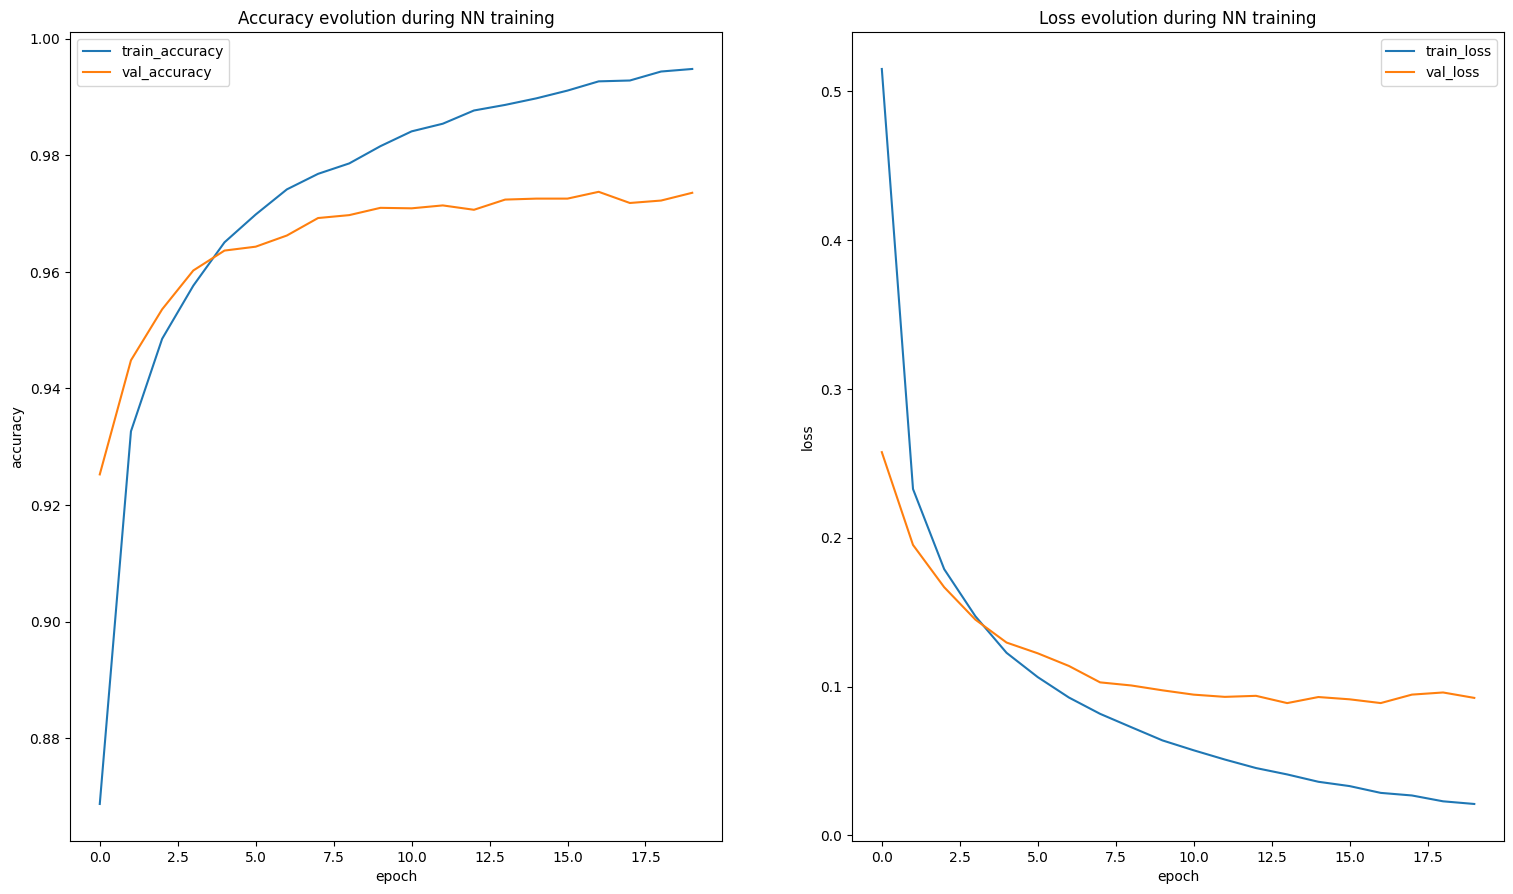

In [ ]:
show_history(story)

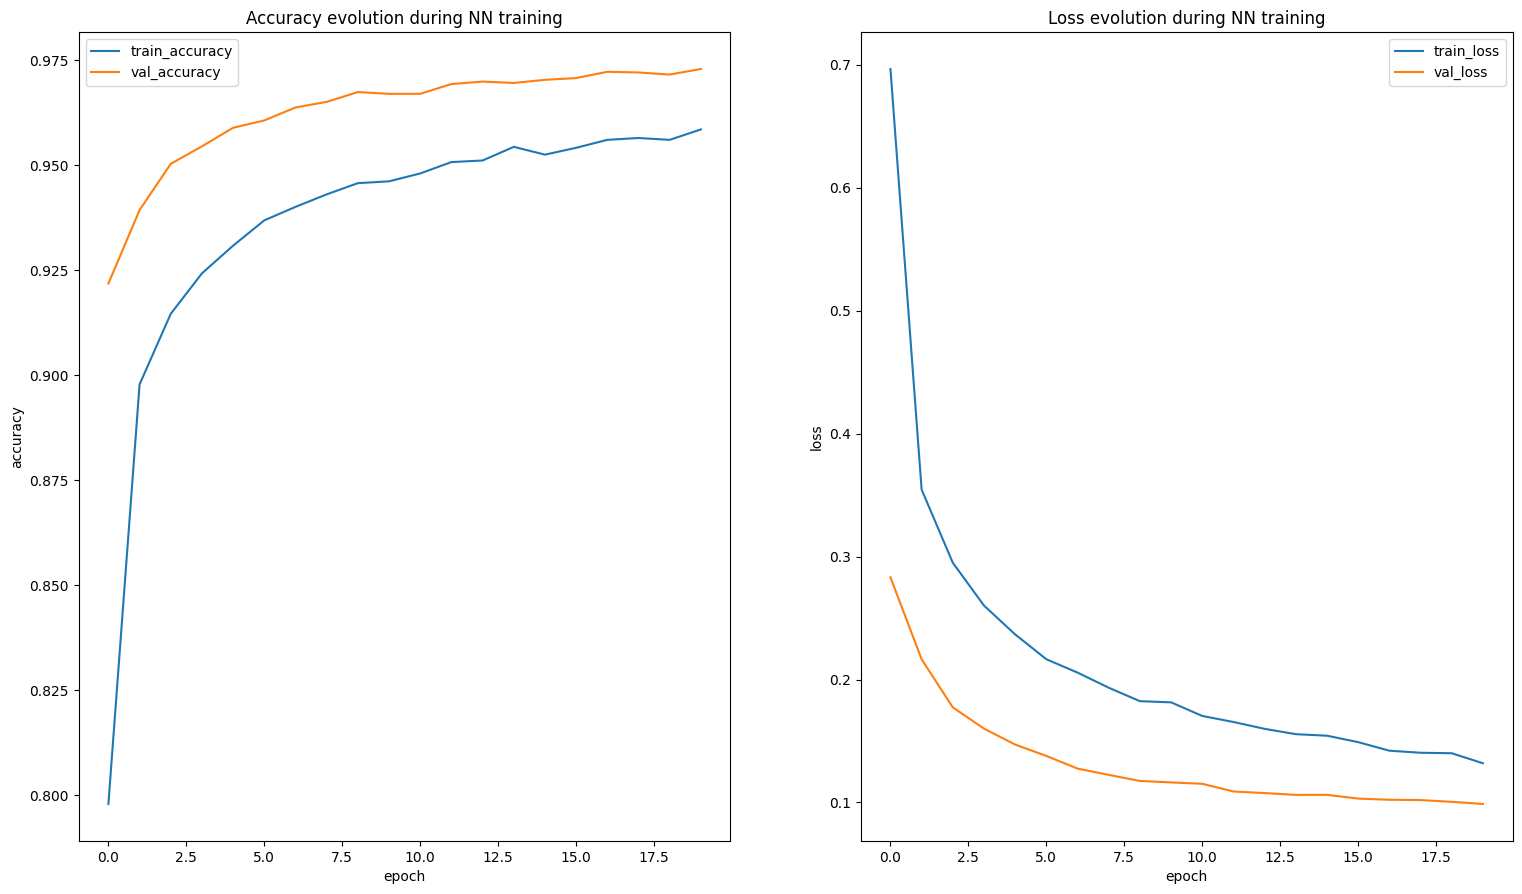

In [ ]:
show_history(story)

# Batch Normalization
- https://machinelearningmastery.com/how-to-accelerate-learning-of-deep-neural-networks-with-batch-normalization/

- https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/

Batch normalization can be implemented during training by calculating the mean and standard deviation of each input to a layer per batch and using these statistics to perform the standardization.

- higher learning rate might be fine when using Batch Normalization



In [ ]:
from keras.layers import BatchNormalization

In [ ]:
#Let's rebuild the model and add a batch normalization layers after each Hidden Layer
# we can also write it all in a function
def batchnorm_model():
    model = Sequential()
    #first hidden layer
    model.add(Dense(num_hidden_n, input_dim=num_input_units, kernel_initializer=keras.initializers.he_normal(seed=seed), activation='relu'))
    model.add(BatchNormalization())
    #model.add(Dense(50, kernel_initializer=keras.initializers.he_normal(seed=seed), activation='relu'))
    #model.add(BatchNormalization())
    #output layer
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

In [ ]:
model = batchnorm_model()
model.summary()
# a batch normalization layer has 4 trainable parameters saved as part of the state of teh Batch Norm layer
# 2 learnable parameters, a “standard deviation” parameter (gamma) and a “mean” parameter (beta)
# 2 non learnable parameters (mean moving average and variance moving average)
# so in total for each hidden layer node, there are 4 learnable parameters

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 90)                70650     
                                                                 
 batch_normalization_1 (Bat  (None, 90)                360       
 chNormalization)                                                
                                                                 
 dense_14 (Dense)            (None, 10)                910       
                                                                 
Total params: 71920 (280.94 KB)
Trainable params: 71740 (280.23 KB)
Non-trainable params: 180 (720.00 Byte)
_________________________________________________________________


In [ ]:
story = model.fit(X_train,
          y_train,
          epochs=15,
          batch_size=128,
          validation_split=0.2,
          verbose=1)

Epoch 1/15
375/375 [==============================] - 2s 4ms/step - loss: 0.3955 - accuracy: 0.8972 - val_loss: 0.2038 - val_accuracy: 0.9489
Epoch 2/15
375/375 [==============================] - 2s 5ms/step - loss: 0.1513 - accuracy: 0.9577 - val_loss: 0.1305 - val_accuracy: 0.9638
Epoch 3/15
375/375 [==============================] - 1s 4ms/step - loss: 0.1023 - accuracy: 0.9716 - val_loss: 0.1161 - val_accuracy: 0.9671
Epoch 4/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0774 - accuracy: 0.9784 - val_loss: 0.1041 - val_accuracy: 0.9690
Epoch 5/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0616 - accuracy: 0.9820 - val_loss: 0.1011 - val_accuracy: 0.9705
Epoch 6/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0488 - accuracy: 0.9865 - val_loss: 0.0952 - val_accuracy: 0.9730
Epoch 7/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0385 - accuracy: 0.9891 - val_loss: 0.0959 - val_accuracy: 0.9722
Epoch 

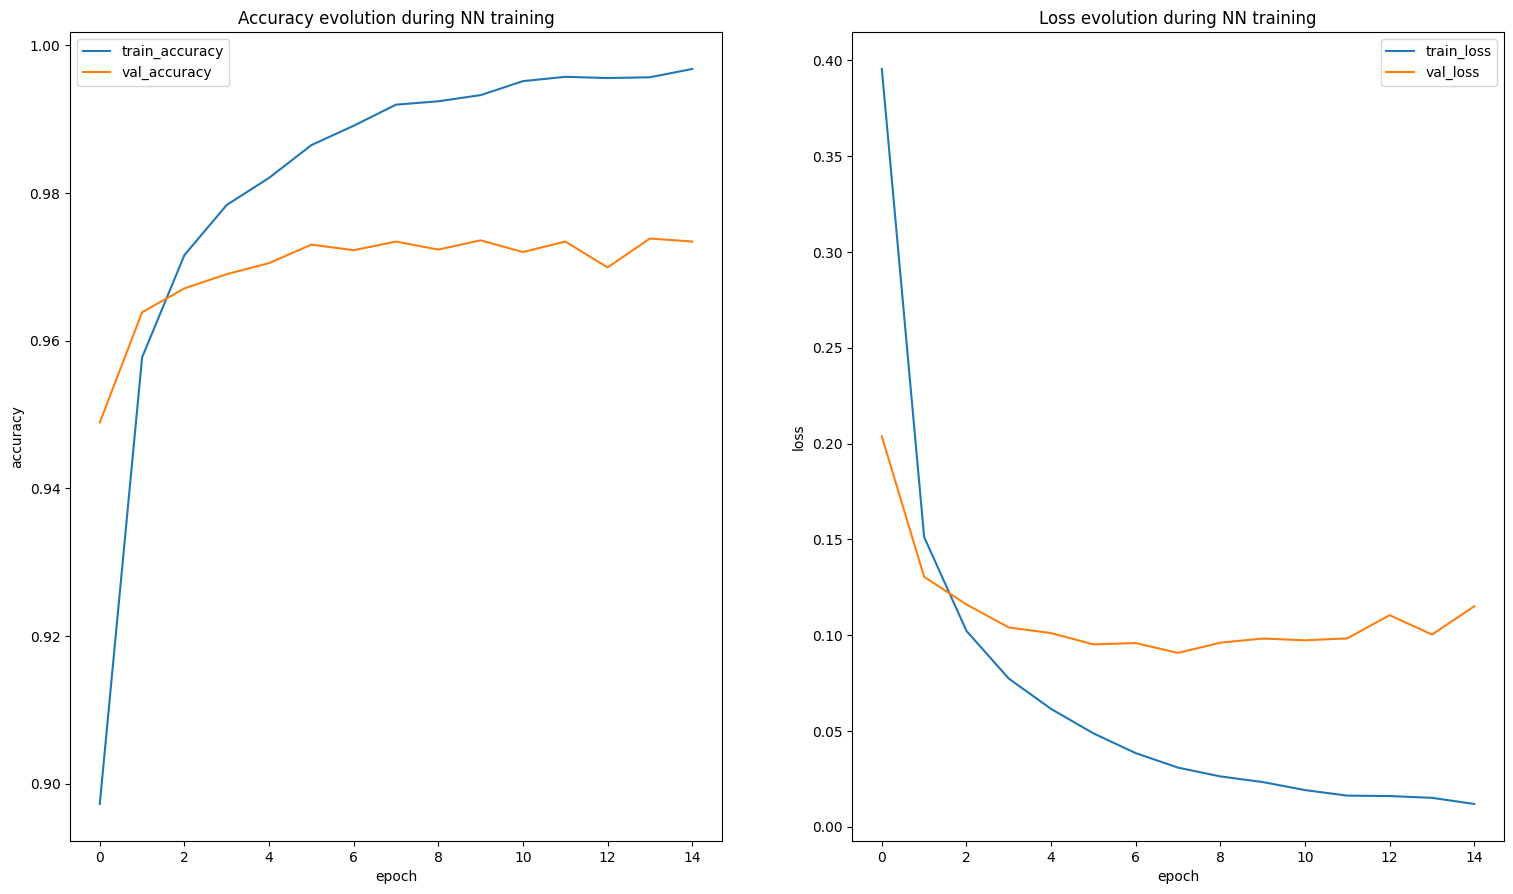

In [ ]:
show_history(story)

# Earlystopping

https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

Callbacks: https://keras.io/api/callbacks/

https://keras.io/api/callbacks/early_stopping/

In [ ]:
model = baseline_model(num_hidden_n, num_input_units, num_classes, optimizer)
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 90)                70650     
                                                                 
 dense_20 (Dense)            (None, 10)                910       
                                                                 
Total params: 71560 (279.53 KB)
Trainable params: 71560 (279.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping
# define a Callback in teh following way
cb = EarlyStopping(monitor='val_loss', min_delta=0.1, verbose=0, patience=3, restore_best_weights=True)
#difference of loss is below min_delta, it is quantified as no improvement
# patience: Number of epochs with no improvement after which training will be stopped
# restore_best_weights: training will run for patience epochs and restore weights from the best epoch in that set.
#fit the previous model using the above defined callback
story = model.fit(X_train,
          y_train,
          epochs=15,
          batch_size=128,
          validation_split=0.2,
          verbose=1,
          callbacks = cb) #[cb, mc])
# evaluate the model

Epoch 1/3
375/375 [==============================] - 2s 5ms/step - loss: 0.5118 - accuracy: 0.8665 - val_loss: 0.2622 - val_accuracy: 0.9275
Epoch 2/3
375/375 [==============================] - 1s 4ms/step - loss: 0.2437 - accuracy: 0.9310 - val_loss: 0.1991 - val_accuracy: 0.9444
Epoch 3/3
375/375 [==============================] - 1s 3ms/step - loss: 0.1873 - accuracy: 0.9461 - val_loss: 0.1680 - val_accuracy: 0.9538


In [ ]:
#Alternatively train epoch by epoch
model = baseline_model(num_hidden_n, num_input_units, num_classes, optimizer)
model.summary()
story = model.fit(X_train,
          y_train,
          epochs=2,
          batch_size=128,
          validation_split=0.2,
          verbose=1
          )

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 90)                70650     
                                                                 
 dense_22 (Dense)            (None, 10)                910       
                                                                 
Total params: 71560 (279.53 KB)
Trainable params: 71560 (279.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2
375/375 [==============================] - 2s 3ms/step - loss: 0.5141 - accuracy: 0.8684 - val_loss: 0.2607 - val_accuracy: 0.9269
Epoch 2/2
375/375 [==============================] - 1s 3ms/step - loss: 0.2407 - accuracy: 0.9319 - val_loss: 0.2018 - val_accuracy: 0.9426


The ModelCheckpoint callback is flexible in the way it can be used, but in this case we will use it only to save the best model observed during training as defined by a chosen performance measure on the validation dataset.



In [ ]:
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=1, save_best_only=True)

In [ ]:
model = baseline_model(num_hidden_n, num_input_units, num_classes, optimizer)
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 90)                70650     
                                                                 
 dense_26 (Dense)            (None, 10)                910       
                                                                 
Total params: 71560 (279.53 KB)
Trainable params: 71560 (279.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
story = model.fit(X_train,
          y_train,
          epochs=15,
          batch_size=128,
          validation_split=0.2,
          verbose=1,
          callbacks = [cb, mc])
# evaluate the model

Epoch 1/15
373/375 [============================>.] - ETA: 0s - loss: 0.5123 - accuracy: 0.8697
Epoch 1: saving model to best_model.h5
375/375 [==============================] - 3s 6ms/step - loss: 0.5111 - accuracy: 0.8700 - val_loss: 0.2464 - val_accuracy: 0.9287
Epoch 2/15
 25/375 [=>............................] - ETA: 1s - loss: 0.2712 - accuracy: 0.9200

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


371/375 [============================>.] - ETA: 0s - loss: 0.2259 - accuracy: 0.9353
Epoch 2: saving model to best_model.h5
375/375 [==============================] - 1s 4ms/step - loss: 0.2254 - accuracy: 0.9355 - val_loss: 0.1863 - val_accuracy: 0.9475
Epoch 3/15
357/375 [===========================>..] - ETA: 0s - loss: 0.1732 - accuracy: 0.9502
Epoch 3: saving model to best_model.h5
375/375 [==============================] - 1s 3ms/step - loss: 0.1715 - accuracy: 0.9507 - val_loss: 0.1571 - val_accuracy: 0.9562
Epoch 4/15
372/375 [============================>.] - ETA: 0s - loss: 0.1394 - accuracy: 0.9604
Epoch 4: saving model to best_model.h5
375/375 [==============================] - 1s 3ms/step - loss: 0.1393 - accuracy: 0.9605 - val_loss: 0.1396 - val_accuracy: 0.9615
Epoch 5/15
358/375 [===========================>..] - ETA: 0s - loss: 0.1176 - accuracy: 0.9666
Epoch 5: saving model to best_model.h5
375/375 [==============================] - 1s 3ms/step - loss: 0.1171 - accura

In [ ]:
# load a saved model
from keras.models import load_model
saved_model = load_model('best_model.h5')

In [ ]:
saved_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 90)                70650     
                                                                 
 dense_24 (Dense)            (None, 10)                910       
                                                                 
Total params: 71560 (279.53 KB)
Trainable params: 71560 (279.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

## Save the model
Once trained, you might want to use the model in the future. You can do so by saving it to a file for later use. Keras comes equipped with the save method, which allows you to easily save your trained model to the disk.

We are going to save the model into a file called model.h5 and delete it from memory.

For more infoa on how to save a keras model, see this [link](https://machinelearningmastery.com/save-load-keras-deep-learning-models//)


In [ ]:
model.save("model.h5")
#del model

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Then we load the model from the file we just created and evaluate it again to make sure that during the saving process, the model hasn’t been corrupted. The error rate is the same: the model has been successfully saved and can be shared with third-parties.

[

In [ ]:
from keras.models import load_model

model2 = load_model("model.h5")

scores2 = model2.evaluate(X_test, y_test, verbose=0)
print("Error Rate: %.2f%%" % (100-scores2[1]*100))

Error Rate: 5.29%


In [ ]:
print(scores2)

[0.1805209368467331, 0.9470999836921692]


## Hyperparameter Tuning with Random Search

https://keras.io/guides/keras_tuner/getting_started/

https://medium.com/swlh/hyperparameter-tuning-in-keras-tensorflow-2-with-keras-tuner-randomsearch-hyperband-3e212647778f

In [ ]:
pip install -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.8 MB/s eta 0:00:00


[Keras Tuner](https://keras-team.github.io/keras-tuner/) offers the main hyperparameter tuning methods: [random search](https://www.sicara.ai/blog/hyperparameter-tuning-keras-tuner), Hyperband, and [Bayesian](https://www.sicara.ai/blog/2019-14-07-determine-network-hyper-parameters-with-bayesian-optimization) optimization.
The most intuitive way to perform hyperparameter tuning is to randomly sample hyperparameter combinations and test them out. This is exactly what the RandomSearch tuner does!

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense
from kerastuner.tuners import RandomSearch, GridSearch, BayesianOptimization
#Keras Tuner offers the main hyperparameter tuning methods: random search, Hyperband, and Bayesian optimization.
#we define a model-building function
# It takes an   an hp argument from which you can sample hyperparameters
def build_model(hp):
    model = keras.Sequential()
    #hp.int specifies its an integer number, you say min, max and a step size, first value it will check is 32, then 160 etc.
    # you can vary activation function as well
    model.add(Dense(units = hp.Int('units',
                                        min_value = 32,
                                        max_value = 512,
                                        step = 128),
                           activation='relu'))
    # Alternatively instead of using hp.Int, you could use hp.Choice:
    #model.add(layers.Dense(units = hp.Choice('units',[32,160]),
     #                      activation= hp.Choice('activation',['relu','tanh'])))

    model.add(Dense(10, activation='softmax'))

    # hp.choice when you want to try different choices
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',
                      values=[1e-2, 1e-3, 1e-4])),
                  # or hp.Float('learning_rate',
                  #                      min_value = 0.0001
                  #                      max_value = 0.1,
                  #                      step = 0.001) for learning rate or dropout
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

Next, let's instantiate a tuner. You should specify the model-building function, the name of the objective to optimize (whether to minimize or maximize is automatically inferred for built-in metrics), the total number of trials (max_trials) to test, and the number of models that should be built and fit for each trial (executions_per_trial).



Note: the purpose of having multiple executions per trial is to reduce results variance and therefore be able to more accurately assess the performance of a model. If you want to get results faster, you could set executions_per_trial=1 (single round of training for each model configuration).



In [ ]:
tuner = RandomSearch(
    #provide it the build_model function
    build_model,
    #The objective is the function to optimize.
    #The tuner infers if it is a maximization or a minimization problem based on its value.
    objective='val_accuracy',
    #max_trials represents the number of hyperparameter combinations that will be tested by the tuner,
    #max number of trials = model config to test at most
    #while execution_per_trial is the number of models that should be built and fit for each trial for robustness purposes.
    max_trials=3,
    # in each trial will do 5 different models
    # the number of models that should be built and fit for each trial
    # the higher number of trials the better, but depends on your time and resources
    executions_per_trial=2,
    directory='my_dir',
    project_name='helloworld3')

Reloading Tuner from my_dir/helloworld3/tuner0.json


In [ ]:
# tells you how many hyperparameters you are looking for ,
# 2 for hidden unit params and learning rate
tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 128, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


Regarding the number of epochs, it's best if you know how many epochs your model needs to converge. You can also use early-stopping to prevent overfitting.

In [ ]:
# now we fit data, tuner.search is aq to model.fit
#Here's what happens in search: models are built iteratively by calling the model-building function,
#which populates the hyperparameter space (search space) tracked by the hp object.
# The tuner progressively explores the space, recording metrics for each configuration.
tuner.search(X_train, y_train,
             epochs=3,
             validation_data=(X_test,y_test))
             #callback = cb)

In [ ]:
#shows hyperparameters and accuracy
tuner.results_summary()

Results summary
Results in my_dir/helloworld3
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
units: 416
learning_rate: 0.01
Score: 0.9584499895572662

Trial 2 summary
Hyperparameters:
units: 160
learning_rate: 0.01
Score: 0.9564999938011169

Trial 0 summary
Hyperparameters:
units: 32
learning_rate: 0.0001
Score: 0.9186999797821045


In [ ]:
tuner.get_best_models()

In [ ]:
best_model = tuner.get_best_models()[0]

In [ ]:
best_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1476 - accuracy: 0.9632


[0.1475832313299179, 0.9631999731063843]

EXample with different number of Hidden Layers

In [ ]:
# different numbers of hidden layers
def build_model_2(hp):
    model = keras.Sequential()
    #hp.int specifies its an integer number, vary btw 2 and 6 hidden layers, step size is 1 by default
    for i in range(hp.Int('layers',2,6)):  #starts with for i in range(2), then for i in range(3), etc.
      model.add(layers.Dense(units=hp.Int('units_' + str(i),# prints units for each hidden layer
                                        min_value=50, # number of nodes in each layer
                                        max_value=100,
                                        step=10),
                             # activation function can be a list of choices:
                           activation= hp.Choice('act_' + str(i),['relu','tanh'])))
    #output stays out of for loop
    model.add(layers.Dense(10, activation='softmax'))

    # hp.choice when you want to try different choices
    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [ ]:
# create instance of RandomSearch
tuner2 = RandomSearch(
    #provide it the build_model function
    build_model_2,
    objective='val_accuracy',
    #max number of trials,  model config to test at most
    max_trials=4,
    # in each trial will do 1 different models
    executions_per_trial=1,
    directory='my_dir',
    project_name='helloworld2')

Reloading Tuner from my_dir/helloworld2/tuner0.json


In [ ]:
tuner2.search_space_summary()
#default search space is 5, when you do a for loop, number of 2 to 6,
# by default it considers number of layers to be 2 , so total search space sums up to 5
#layers/ units in 0/ acti in 0 /units in 1 / act in 1 --> sums search space size to 5
# later it will change number of layer to 3/4/6

Search space summary
Default search space size: 11
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 6, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 100, 'step': 10, 'sampling': 'linear'}
act_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 100, 'step': 10, 'sampling': 'linear'}
act_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 100, 'step': 10, 'sampling': 'linear'}
act_2 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 100, 'step': 10, 'sampling': 'linear'}
act_3 (Choice)
{'default': 'relu', 'conditions': [], 'values':

In [ ]:
# now we fit data, tuner.search is aq to model.fit
tuner2.search(X_train, y_train,
             epochs=2,
             validation_data=(X_test,y_test))

In [ ]:
#showing 10 best trials, but here only 4 cause we set max trials to 4
# this would have taken a lot of time manually
tuner2.results_summary()

Results summary
Results in my_dir/helloworld2
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
layers: 3
units_0: 50
act_0: relu
units_1: 70
act_1: tanh
units_2: 50
act_2: relu
Score: 0.9642000198364258

Trial 3 summary
Hyperparameters:
layers: 2
units_0: 50
act_0: relu
units_1: 80
act_1: relu
units_2: 100
act_2: tanh
units_3: 60
act_3: relu
units_4: 100
act_4: relu
Score: 0.9616000056266785

Trial 2 summary
Hyperparameters:
layers: 5
units_0: 60
act_0: tanh
units_1: 60
act_1: tanh
units_2: 50
act_2: tanh
units_3: 70
act_3: relu
units_4: 80
act_4: relu
Score: 0.9577999711036682

Trial 1 summary
Hyperparameters:
layers: 5
units_0: 90
act_0: relu
units_1: 60
act_1: relu
units_2: 90
act_2: relu
units_3: 50
act_3: relu
units_4: 50
act_4: relu
Score: 0.9571999907493591


**Hyperband Concept:**
This technique tries to remove one of the problems in random, which is that it may pick some values which are very obviously bad and will do full training and evaluation on it, which is wasteful.
Hyperband Solution: Randomly sample all the combinations of hyperparameter and now instead of running full training and evaluation on it, train the **model for few epochs (less than max_epochs)** with these combinations and select the best candidates based on the results on these few epochs. It does this iteratively and finally runs full training and evaluation on the final chosen candidates. The number of iterations done depends on parameter ‘hyperband_iterations’ and number of epochs in each iteration are less than ‘max_epochs’.

**Bayesian Optimization** tuner Concept:
This techniques addresses a common problem in RandomSearch and Hyperband, which is that All the hyperparameter combinations are chosen randomly. Choosing hyperparameters randomly helps to explore the hyperparameter space but does not guarantee absolute optimal hyperparameters. Solution provided by BayesianOptimization tuner: Instead of all combinations being random, it chooses first few randomly, then based on the performance on these hyperparameters it chooses the next best possible hyperparameters. Hence it takes into account the history of the hyperparameters which were tried. The iterations of choosing next set of hyperparameters based on history and evaluating performance continues till the tuner reaches optimal hyperparameters or exhausts maximum number of allowed trails.